In [1]:

from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import load_iris 
SEED=2017


In [3]:
iris = load_iris()
idxs = np.where(iris.target < 2)
X = iris.data[idxs]
y = iris.target[idxs]


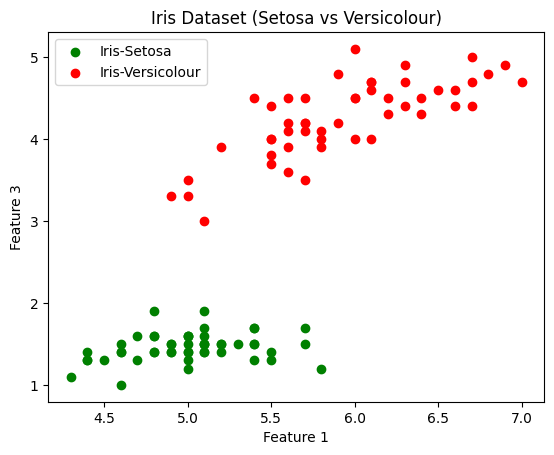

In [4]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 2], color='green', label='Iris-Setosa')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 2], color='red', label='Iris-Versicolour')
plt.xlabel('Feature 1')
plt.ylabel('Feature 3')
plt.legend()
plt.title('Iris Dataset (Setosa vs Versicolour)')
plt.show()

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [6]:
weights = np.random.normal(size=X_train.shape[1])
bias = 1

In [7]:
learning_rate = 0.1
n_epochs = 15

In [8]:
hist_loss = []
hist_accuracy = []

# Training the perceptron
for epoch in range(n_epochs):
    # Compute predictions
    output = np.where((X_train.dot(weights) + bias) > 0.5, 1, 0)

    # Compute the Mean Squared Error (MSE)
    error = np.mean((y_train - output) ** 2)
    print(f"Epoch {epoch + 1}/{n_epochs} - Error: {error}")


Epoch 1/15 - Error: 0.5125
Epoch 2/15 - Error: 0.5125
Epoch 3/15 - Error: 0.5125
Epoch 4/15 - Error: 0.5125
Epoch 5/15 - Error: 0.5125
Epoch 6/15 - Error: 0.5125
Epoch 7/15 - Error: 0.5125
Epoch 8/15 - Error: 0.5125
Epoch 9/15 - Error: 0.5125
Epoch 10/15 - Error: 0.5125
Epoch 11/15 - Error: 0.5125
Epoch 12/15 - Error: 0.5125
Epoch 13/15 - Error: 0.5125
Epoch 14/15 - Error: 0.5125
Epoch 15/15 - Error: 0.5125


In [9]:
weights -= learning_rate * np.dot((output - y_train), X_train) / len(y_train) 
bias += learning_rate * np.sum(output - y_train) / len(y_train)


In [10]:
loss = np.mean((output - y_train) ** 2)
hist_loss.append(loss)


In [11]:
output_val = np.where(X_val.dot(weights) + bias > 0.5, 1, 0)
accuracy = np.mean(y_val == output_val)
hist_accuracy.append(accuracy)


In [12]:
fig = plt.figure(figsize=(16, 6))

<Figure size 1600x600 with 0 Axes>

In [13]:
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(hist_loss, label='Training Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss')
ax1.legend()

In [14]:
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(hist_accuracy, label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Validation Accuracy')
ax2.legend()

plt.show()